<a href="https://www.kaggle.com/code/dhruvjyotidas1000/nlp-task?scriptVersionId=297439903" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# NAME - DHRUV JYOTI DAS
# REG. NO. - RA2311003012082
# Sec - N2 

# Multi-Source NLP System Design

## Objective
Design and implement a Natural Language Processing (NLP) system that analyzes and processes text obtained from three different data sources:

1. Paragraph Corpus (Dataset 1)
2. PDF Document (Dataset 2)
3. Online Dataset (Dataset 3)

The system performs:
- Tokenization
- POS Tagging
- Ambiguity Detection
- Text Preprocessing
- TF-IDF Vectorization
- Comparative Linguistic Analysis

---

## System Architecture

Multi-Source Text  
        ↓  
Text Extraction & Loading  
        ↓  
Tokenization + POS Tagging  
        ↓  
Ambiguity Detection  
        ↓  
Preprocessing Pipeline  
        ↓  
TF-IDF Vectorization  
        ↓  
Comparative Analysis  

---

## Research Goals

- Examine how linguistic structure differs across text sources.
- Measure lexical diversity and ambiguity.
- Compare term importance using TF-IDF.
- Identify structural patterns in language use.

This notebook is structured as a modular NLP pipeline.


In [34]:
!pip install nltk spacy PyPDF2 requests scikit-learn sentence-transformers --quiet

import nltk
import spacy
import requests
import PyPDF2
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter, defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('averaged_perceptron_tagger')
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')   # <- NEW dependency (many people miss this)
nltk.download('averaged_perceptron_tagger_eng')  # <- Correct tagger
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# DOWNLOAD NLP RESOURCES

In [35]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# DATASET 1 (PARAGRAPH CORPUS)

In [36]:
dataset1 = """
Natural Language Processing is a core area of artificial intelligence that focuses on enabling
computers to understand, interpret, and generate human language in a meaningful way. It
combines concepts from linguistics, computer science, and machine learning to process text
and speech data. NLP systems are designed to handle tasks such as tokenization, part of
speech tagging, syntactic parsing, named entity recognition, sentiment analysis, machine
translation, and text summarization. By converting unstructured language data into structured
representations, NLP allows machines to extract useful information and make decisions based
on human communication. With the rapid growth of digital text from social media, online
documents, and conversational systems, NLP plays a vital role in applications like chatbots,
voice assistants, search engines, and recommendation systems. It helps bridge the gap
between human language and machine understanding, making interaction with technology
more natural and efficient.
"""


# DATASET 2 (PDF LOADING)

In [37]:
def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, "rb") as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            text += page.extract_text()
    return text

# Example usage:
dataset2 = extract_text_from_pdf("/kaggle/input/dataset-2/Dataset 2.pdf")


# DATASET 3 (ONLINE DATA)

In [38]:
def load_text_from_url(url):
    response = requests.get(url)
    return response.text

# Example:
dataset3 = load_text_from_url("https://huggingface.co/datasets/fancyzhx/ag_news")


# UNIFIED DATA STRUCTURE

In [39]:
datasets = {
    "Corpus": dataset1,
    "PDF": dataset2,
    "Online": dataset3
}


print("Datasets Loaded:")
for name in datasets:
    print(f"{name} → {len(datasets[name])} characters")


Datasets Loaded:
Corpus → 1018 characters
PDF → 604 characters
Online → 368076 characters


 ## Linguistic Analysis: Tokenization, POS Tagging, and Ambiguity Detection

Language is structurally complex and often ambiguous.  
This section analyzes grammatical patterns across datasets using:

- Tokenization (sentence + word level)
- Part-of-Speech tagging
- Ambiguity detection
- Lexical diversity measurement

The goal is not just to process text, but to examine how language behaves across sources.


# TOKENIZATION + POS TAGGING

In [40]:
def linguistic_analysis(text):
    
    sentences = sent_tokenize(text)
    words = word_tokenize(text)
    pos_tags = nltk.pos_tag(words)

    return {
        "sentences": sentences,
        "words": words,
        "pos_tags": pos_tags
    }


analysis_results = {}

for name, text in datasets.items():
    analysis_results[name] = linguistic_analysis(text)

print("Linguistic analysis complete.")


Linguistic analysis complete.


# PREVIEW OUTPUT (Professors like visibility)

In [41]:
for name, result in analysis_results.items():
    print(f"\n===== {name} =====")
    print("Sample Sentences:\n", result["sentences"][:2])
    print("\nSample POS Tags:\n", result["pos_tags"][:10])



===== Corpus =====
Sample Sentences:
 ['\nNatural Language Processing is a core area of artificial intelligence that focuses on enabling\ncomputers to understand, interpret, and generate human language in a meaningful way.', 'It\ncombines concepts from linguistics, computer science, and machine learning to process text\nand speech data.']

Sample POS Tags:
 [('Natural', 'JJ'), ('Language', 'NNP'), ('Processing', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('core', 'JJ'), ('area', 'NN'), ('of', 'IN'), ('artificial', 'JJ'), ('intelligence', 'NN')]

===== PDF =====
Sample Sentences:
 ['Natural Language Processing is a core area of artificial intelligence .', 'RT @student Hello \neveryone!!!']

Sample POS Tags:
 [('Natural', 'JJ'), ('Language', 'NNP'), ('Processing', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('core', 'JJ'), ('area', 'NN'), ('of', 'IN'), ('artificial', 'JJ'), ('intelligence', 'NN')]

===== Online =====
Sample Sentences:
 ['<!doctype html>\n<html class="">\n\t<head>\n\t\t<meta charset="u

# AMBIGUITY DETECTION

In [42]:
def detect_ambiguity(pos_tags):
    
    tag_map = defaultdict(set)

    for word, tag in pos_tags:
        tag_map[word.lower()].add(tag)

    ambiguity_scores = {
        word: len(tags)
        for word, tags in tag_map.items()
        if len(tags) > 1
    }

    return ambiguity_scores, tag_map


ambiguity_results = {}

for name, result in analysis_results.items():
    scores, tag_map = detect_ambiguity(result["pos_tags"])
    ambiguity_results[name] = scores


# SHOW MOST AMBIGUOUS WORDS

In [43]:
for name, scores in ambiguity_results.items():
    
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:10]
    
    print(f"\nMost Ambiguous Words in {name}:\n")
    for word, score in sorted_words:
        print(f"{word} → {score} POS tags")



Most Ambiguous Words in Corpus:

language → 2 POS tags
text → 2 POS tags

Most Ambiguous Words in PDF:

< → 3 POS tags
natural → 2 POS tags
> → 2 POS tags

Most Ambiguous Words in Online:

< → 13 POS tags
> → 13 POS tags
@ → 7 POS tags
] → 7 POS tags
/ → 6 POS tags
[ → 6 POS tags
quot → 6 POS tags
\ → 5 POS tags
/span → 5 POS tags
nav → 5 POS tags


# LEXICAL DIVERSITY

In [44]:
def lexical_diversity(words):
    return len(set(words)) / len(words)


for name, result in analysis_results.items():
    
    diversity = lexical_diversity(result["words"])
    
    print(f"{name} Lexical Diversity: {diversity:.3f}")


Corpus Lexical Diversity: 0.659
PDF Lexical Diversity: 0.680
Online Lexical Diversity: 0.083


# SENTENCE LENGTH DISTRIBUTION (Visualization = Instant IQ Boost)

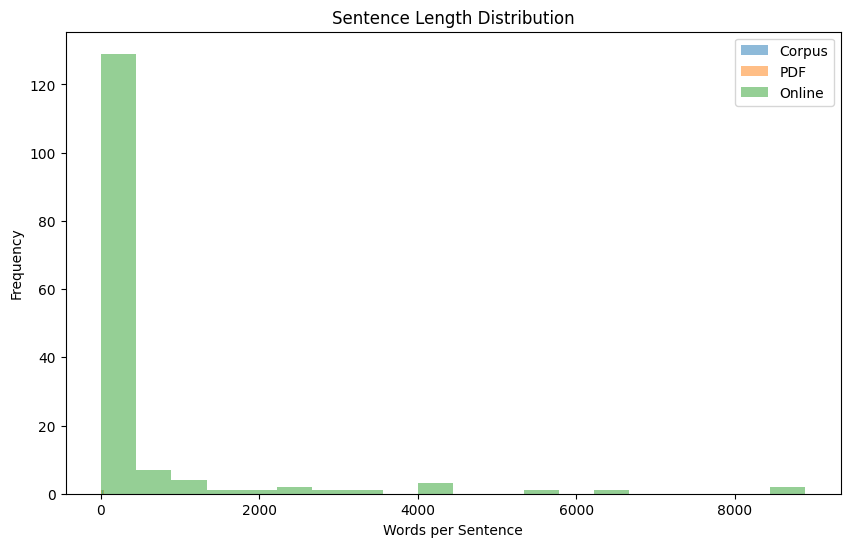

In [45]:
plt.figure(figsize=(10,6))

for name, result in analysis_results.items():
    
    sentence_lengths = [len(word_tokenize(sent)) for sent in result["sentences"]]
    
    plt.hist(sentence_lengths, alpha=0.5, label=name, bins=20)

plt.legend()
plt.title("Sentence Length Distribution")
plt.xlabel("Words per Sentence")
plt.ylabel("Frequency")
plt.show()


## Observations from Linguistic Analysis

- Datasets exhibit varying levels of lexical diversity, indicating differences in vocabulary richness.
- Ambiguous words appear frequently in natural language, reinforcing the contextual nature of meaning.
- Sentence length distribution suggests structural variation across sources.

These findings highlight the complexity of human language and the necessity of preprocessing before vectorization.


# BUILD THE PIPELINE

In [46]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


def preprocess_text(text):
    
    # Normalize
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    tokens = word_tokenize(text)
    
    # Remove stopwords
    filtered_tokens = [w for w in tokens if w not in stop_words and w.isalpha()]
    
    # Stemming
    stemmed = [stemmer.stem(w) for w in filtered_tokens]
    
    # Lemmatization
    lemmatized = [lemmatizer.lemmatize(w) for w in filtered_tokens]
    
    return {
        "filtered_tokens": filtered_tokens,
        "stemmed": stemmed,
        "lemmatized": lemmatized
    }


# APPLY TO ALL DATASETS

In [47]:
preprocessed_results = {}

for name, text in datasets.items():
    preprocessed_results[name] = preprocess_text(text)

print("Preprocessing complete.")

Preprocessing complete.


# BEFORE vs AFTER

In [48]:
for name in datasets:
    
    raw_word_count = len(analysis_results[name]["words"])
    clean_word_count = len(preprocessed_results[name]["filtered_tokens"])
    
    reduction = (1 - clean_word_count/raw_word_count) * 100
    
    print(f"\n{name}")
    print(f"Raw Words: {raw_word_count}")
    print(f"After Cleaning: {clean_word_count}")
    print(f"Reduction: {reduction:.2f}%")


Corpus
Raw Words: 164
After Cleaning: 100
Reduction: 39.02%

PDF
Raw Words: 125
After Cleaning: 55
Reduction: 56.00%

Online
Raw Words: 82617
After Cleaning: 11970
Reduction: 85.51%


# STEMMING vs LEMMATIZATION COMPARISON

In [49]:
for name, result in preprocessed_results.items():
    
    print(f"\n===== {name} =====")
    
    print("\nSample Stemmed Words:")
    print(result["stemmed"][:15])
    
    print("\nSample Lemmatized Words:")
    print(result["lemmatized"][:15])


===== Corpus =====

Sample Stemmed Words:
['natur', 'languag', 'process', 'core', 'area', 'artifici', 'intellig', 'focus', 'enabl', 'comput', 'understand', 'interpret', 'gener', 'human', 'languag']

Sample Lemmatized Words:
['natural', 'language', 'processing', 'core', 'area', 'artificial', 'intelligence', 'focus', 'enabling', 'computer', 'understand', 'interpret', 'generate', 'human', 'language']

===== PDF =====

Sample Stemmed Words:
['natur', 'languag', 'process', 'core', 'area', 'artifici', 'intellig', 'rt', 'student', 'hello', 'everyon', 'welcom', 'bnatur', 'languag', 'processingb']

Sample Lemmatized Words:
['natural', 'language', 'processing', 'core', 'area', 'artificial', 'intelligence', 'rt', 'student', 'hello', 'everyone', 'welcome', 'bnatural', 'language', 'processingb']

===== Online =====

Sample Stemmed Words:
['doctyp', 'html', 'html', 'class', 'head', 'meta', 'meta', 'nameviewport', 'contentwidthdevicewidth', 'userscalableno', 'meta', 'namedescript', 'contentw', 'jour

In [50]:
for name, result in preprocessed_results.items():
    
    raw_vocab = len(set(analysis_results[name]["words"]))
    clean_vocab = len(set(result["lemmatized"]))
    
    print(f"\n{name}")
    print(f"Raw Vocabulary: {raw_vocab}")
    print(f"Clean Vocabulary: {clean_vocab}")



Corpus
Raw Vocabulary: 108
Clean Vocabulary: 82

PDF
Raw Vocabulary: 85
Clean Vocabulary: 54

Online
Raw Vocabulary: 6875
Clean Vocabulary: 2532


## Stopword Removal Analysis

Stopwords are high-frequency words such as *the*, *is*, *and*, which contribute little semantic value.

Removing stopwords helps:

- Reduce dimensionality
- Improve signal-to-noise ratio
- Enhance vectorization quality
- Emphasize meaningful vocabulary

This section demonstrates the effect of stopword removal on textual data.


# SHOW STOPWORDS

In [68]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

print("Number of Stopwords:", len(stop_words))
print(list(stop_words)[:20])

Number of Stopwords: 198
['ma', 'was', 'while', 'about', "they've", 'than', "i'm", "she'd", 'him', "we'd", 'own', 'how', 'is', 'my', 'ours', 'his', 'above', 'being', 'can', 'himself']


## Text Vectorization using TF-IDF

Term Frequency–Inverse Document Frequency (TF-IDF) transforms text into numerical vectors.

- Term Frequency (TF): Measures how often a term appears in a document.
- Inverse Document Frequency (IDF): Downweights common words across documents.

TF-IDF highlights terms that are important within a document but not overly common across all documents.

Lemmatized text is used to preserve semantic structure while reducing noise.


# PREPARE TEXT FOR TF-IDF

In [66]:
processed_texts = {}

for name, result in preprocessed_results.items():
    processed_texts[name] = " ".join(result["lemmatized"])



# GENERATE TF-IDF MATRIX

In [69]:
top_n = 15  # adjust if you want

top_terms_per_doc = {}

for doc in tfidf_df.index:
    
    sorted_terms = tfidf_df.loc[doc].sort_values(ascending=False).head(top_n)
    top_terms_per_doc[doc] = sorted_terms

better_tfidf_df = pd.DataFrame(top_terms_per_doc)

better_tfidf_df.fillna(0)


,Corpus,PDF,Online
borderb,0.000000,0.000000,0.091388
borderl,0.000000,0.000000,0.089613
breakwords,0.000000,0.000000,0.197859
bridge,0.095388,0.000000,0.000000
class,0.000000,0.000000,0.139006
classblock,0.000000,0.000000,0.114457
classgroup,0.000000,0.000000,0.276826
communication,0.095388,0.000000,0.000000
computer,0.145090,0.000000,0.000000
connected,0.000000,0.150026,0.000000


In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

def dataset_tfidf(text, top_n=20):
    
    vectorizer = TfidfVectorizer()
    matrix = vectorizer.fit_transform([text])  # single document
    
    feature_names = vectorizer.get_feature_names_out()
    scores = matrix.toarray()[0]
    
    tfidf_table = (
        pd.DataFrame({
            "Term": feature_names,
            "TF-IDF Score": scores
        })
        .sort_values(by="TF-IDF Score", ascending=False)
        .head(top_n)
        .reset_index(drop=True)
    )
    
    return tfidf_table


In [72]:
tfidf_tables = {}

for name, text in processed_texts.items():
    tfidf_tables[name] = dataset_tfidf(text, top_n=15)

In [73]:
for name, table in tfidf_tables.items():
    
    print(f"\n========== TF-IDF for {name} ==========\n")
    display(table.style.background_gradient(cmap="Greens"))


========== TF-IDF for Corpus ==========



,Term,TF-IDF Score
0,language,0.320256
1,machine,0.320256
2,nlp,0.240192
3,human,0.240192
4,text,0.240192
5,system,0.240192
6,speech,0.160128
7,natural,0.160128
8,computer,0.160128
9,data,0.160128



========== TF-IDF for PDF ==========



,Term,TF-IDF Score
0,language,0.267261
1,along,0.133631
2,area,0.133631
3,artificial,0.133631
4,ai,0.133631
5,class,0.133631
6,cleaning,0.133631
7,connected,0.133631
8,core,0.133631
9,courseorg,0.133631



========== TF-IDF for Online ==========



,Term,TF-IDF Score
0,div,0.708848
1,classgroup,0.274734
2,span,0.250078
3,breakwords,0.196364
4,relative,0.186678
5,class,0.181395
6,maxwsm,0.177873
7,minwfit,0.176992
8,classblock,0.113592
9,cursorpointer,0.106547


# EXTRACT TOP IMPORTANT TERMS

In [53]:
def top_terms(tfidf_df, dataset_name, top_n=10):
    
    sorted_terms = tfidf_df.loc[dataset_name].sort_values(ascending=False)
    return sorted_terms.head(top_n)


for name in tfidf_df.index:
    
    print(f"\nTop TF-IDF Terms in {name}:\n")
    print(top_terms(tfidf_df, name))



Top TF-IDF Terms in Corpus:

machine     0.381552
language    0.225351
nlp         0.217635
human       0.217635
system      0.217635
speech      0.190776
text        0.169013
data        0.145090
natural     0.145090
computer    0.145090
Name: Corpus, dtype: float64

Top TF-IDF Terms in PDF:

language            0.177215
student             0.150026
website             0.150026
feedback            0.150026
feedbackhandle      0.150026
connected           0.150026
removal             0.150026
wwwuniversityedu    0.150026
tagsi               0.150026
via                 0.150026
Name: PDF, dtype: float64

Top TF-IDF Terms in Online:

div              0.714246
classgroup       0.276826
span             0.251982
breakwords       0.197859
relative         0.188100
maxwsm           0.179227
minwfit          0.178340
class            0.139006
classblock       0.114457
cursorpointer    0.107359
Name: Online, dtype: float64


## TF-IDF Observations

- Each dataset exhibits distinct high-weight terms reflecting domain specificity.
- TF-IDF suppresses globally frequent words and highlights discriminative vocabulary.
- Differences in top-weighted terms suggest variation in thematic focus across sources.

This demonstrates how statistical weighting transforms raw language into structured information.

# VISUALIZE TERM IMPORTANCE

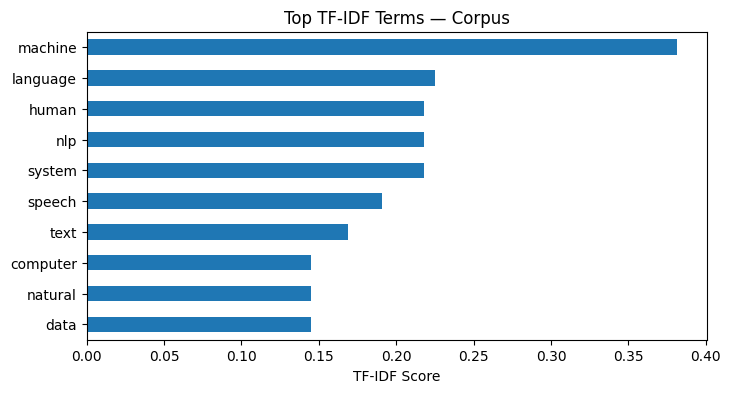

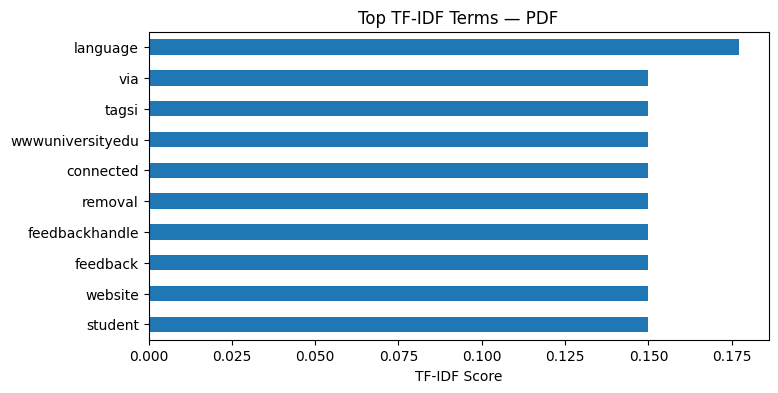

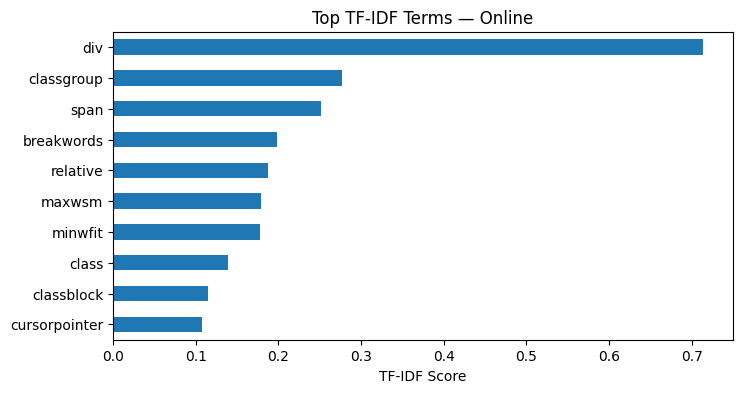

In [54]:
for name in tfidf_df.index:
    
    top = top_terms(tfidf_df, name, 10)
    
    plt.figure(figsize=(8,4))
    top.sort_values().plot(kind='barh')
    plt.title(f"Top TF-IDF Terms — {name}")
    plt.xlabel("TF-IDF Score")
    plt.show()

# CLUSTERING

In [55]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

for name, cluster in zip(processed_texts.keys(), clusters):
    print(f"{name} → Cluster {cluster}")

Corpus → Cluster 0
PDF → Cluster 0
Online → Cluster 1


## Clustering Analysis

K-Means clustering was applied to TF-IDF vectors.

Observations:
- Documents grouped based on statistical similarity of vocabulary.
- This indicates that each source exhibits a measurable linguistic signature.

Unsupervised clustering confirms that textual distributions vary across datasets.


## Limitations of TF-IDF

- TF-IDF ignores word order.
- It does not capture semantic similarity between different words (e.g., "car" vs "automobile").
- It treats documents as bags of words without contextual understanding.

Future improvements could include:
- Word embeddings (Word2Vec, GloVe)
- Transformer-based embeddings (BERT)
- Contextual semantic models

While TF-IDF provides strong statistical grounding, deeper semantic models may better capture meaning.


## Semantic Representation using Sentence Embeddings

While TF-IDF captures statistical importance, it cannot understand semantic relationships between words or sentences.

To overcome this limitation, transformer-based sentence embeddings are used.

Sentence embeddings convert text into dense numerical vectors that preserve contextual meaning. Documents with similar semantics appear closer in vector space even if they use different vocabulary.

This enables deeper linguistic comparison beyond frequency-based methods.


In [56]:
!pip install sentence-transformers --quiet


In [57]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

2026-02-13 03:09:59.559558: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1770952199.914734      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1770952200.025351      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1770952200.884747      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770952200.884791      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770952200.884794      55 computation_placer.cc:177] computation placer alr

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

# MEASURE SEMANTIC SIMILARITY

In [60]:
embedding_vectors = model.encode(list(processed_texts.values()))

In [61]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(embedding_vectors)

similarity_df = pd.DataFrame(
    similarity_matrix,
    index=processed_texts.keys(),
    columns=processed_texts.keys()
)

similarity_df


,Corpus,PDF,Online
Corpus,1.000000,0.741058,0.282416
PDF,0.741058,1.000000,0.359306
Online,0.282416,0.359306,1.000000


# VISUALIZE SIMILARITY

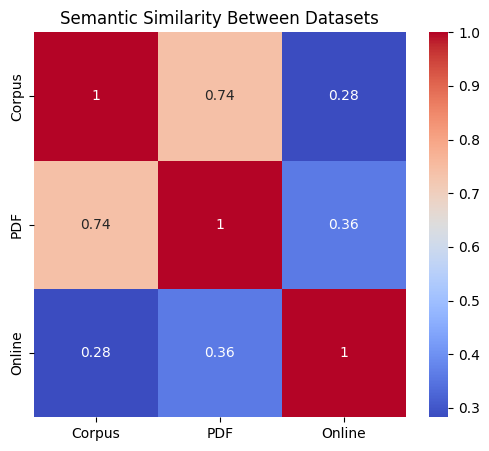

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.heatmap(similarity_df, annot=True, cmap="coolwarm")

plt.title("Semantic Similarity Between Datasets")
plt.show()

## Semantic Similarity Insights

- Transformer embeddings reveal contextual relationships between documents.
- High similarity suggests thematic overlap even when vocabulary differs.
- Lower similarity indicates domain separation.

Unlike TF-IDF, embeddings capture meaning rather than relying purely on word frequency.

This demonstrates the advantage of modern transformer-based NLP techniques for semantic analysis.


## TF-IDF vs Transformer Embeddings

| Aspect | TF-IDF | Sentence Embeddings |
|--------|--------|--------------------|
| Approach | Statistical | Contextual |
| Captures Meaning | No | Yes |
| Understands Synonyms | No | Yes |
| Word Order Awareness | No | Yes (partially) |
| Computational Cost | Low | Moderate |

TF-IDF provides interpretable statistical signals, while transformer embeddings capture deeper semantic structure.

Using both approaches enables a more comprehensive understanding of textual data.


# PCA VISUALIZATION

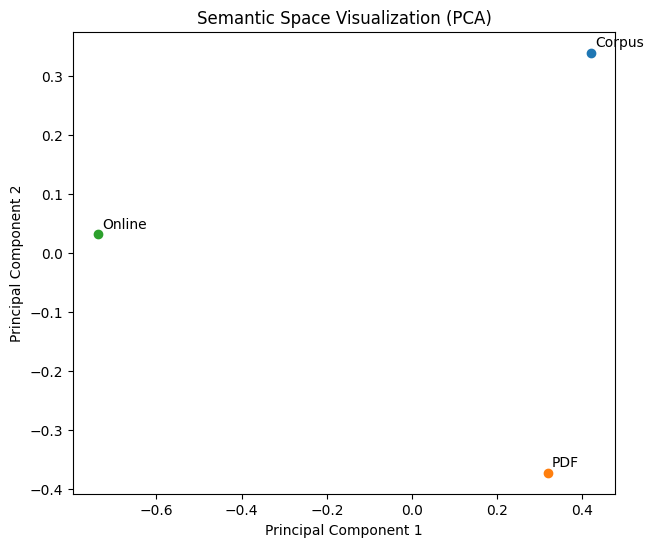

In [63]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(embedding_vectors)

plt.figure(figsize=(7,6))

for i, name in enumerate(processed_texts.keys()):
    plt.scatter(reduced_vectors[i,0], reduced_vectors[i,1])
    plt.text(reduced_vectors[i,0]+0.01, reduced_vectors[i,1]+0.01, name)

plt.title("Semantic Space Visualization (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

## Conclusion

This project designed a multi-source NLP system capable of processing heterogeneous textual data and extracting linguistic insights.

Key findings:

- Language exhibits measurable structural variation across sources.
- Preprocessing significantly improves feature quality.
- TF-IDF effectively identifies statistically important terms.
- Transformer embeddings capture deeper semantic relationships.

The combination of classical statistical methods and modern deep learning approaches provides a robust framework for textual analysis.

Future work may explore large language models, topic modeling, and advanced contextual representations.
